In [10]:


import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv


In [11]:
df  = pd.read_csv('/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head(4)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No


In [12]:
#check for null values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [13]:
# Coverting the total charge column to numeric
#to handle any conversion errors by converting them to NaN
df["TotalCharges"] = df["TotalCharges"].apply(pd.to_numeric, errors="coerce")

In [14]:
# Filling missing total charge with mean
df["TotalCharges"].fillna(df["TotalCharges"].mean(), inplace=True) 

In [15]:
df.duplicated().sum()

0

In [16]:
df.drop('customerID', axis=1, inplace = True)
df.shape

(7043, 20)

In [17]:
df.nunique()

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [18]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [19]:

# List of columns with "Yes" and "No" values to be one-hot encoded
yes_no_columns = ["Partner", "Dependents", "PhoneService","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies","PaperlessBilling", "Churn"]

# Perform one-hot encoding for the selected columns
for column in yes_no_columns:
    df[column] = df[column].map({"Yes": 1, "No": 0})

# Print the resulting DataFrame
print(df)


      gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0     Female              0        1           0       1             0   
1       Male              0        0           0      34             1   
2       Male              0        0           0       2             1   
3       Male              0        0           0      45             0   
4     Female              0        0           0       2             1   
...      ...            ...      ...         ...     ...           ...   
7038    Male              0        1           1      24             1   
7039  Female              0        1           1      72             1   
7040  Female              0        1           1      11             0   
7041    Male              1        1           0       4             1   
7042    Male              0        0           0      66             1   

         MultipleLines InternetService  OnlineSecurity  OnlineBackup  \
0     No phone service             DSL 

In [20]:
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler instance
scaler = MinMaxScaler()

# Define the columns you want to scale (numeric columns)
columns_to_scale = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

# Fit and transform the selected columns
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

# Display the resulting dataset with scaled values
print(df.head())


   gender  SeniorCitizen  Partner  Dependents    tenure  PhoneService  \
0  Female            0.0        1           0  0.013889             0   
1    Male            0.0        0           0  0.472222             1   
2    Male            0.0        0           0  0.027778             1   
3    Male            0.0        0           0  0.625000             0   
4  Female            0.0        0           0  0.027778             1   

      MultipleLines InternetService  OnlineSecurity  OnlineBackup  \
0  No phone service             DSL             0.0           1.0   
1                No             DSL             1.0           0.0   
2                No             DSL             1.0           1.0   
3  No phone service             DSL             1.0           0.0   
4                No     Fiber optic             0.0           0.0   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  \
0               0.0          0.0          0.0              0.0   
1             

In [21]:
df.head(4)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0.0,1,0,0.013889,0,No phone service,DSL,0.0,1.0,0.0,0.0,0.0,0.0,Month-to-month,1,Electronic check,0.115423,0.001275,0
1,Male,0.0,0,0,0.472222,1,No,DSL,1.0,0.0,1.0,0.0,0.0,0.0,One year,0,Mailed check,0.385075,0.215867,0
2,Male,0.0,0,0,0.027778,1,No,DSL,1.0,1.0,0.0,0.0,0.0,0.0,Month-to-month,1,Mailed check,0.354229,0.010310,1
3,Male,0.0,0,0,0.625000,0,No phone service,DSL,1.0,0.0,1.0,1.0,0.0,0.0,One year,0,Bank transfer (automatic),0.239303,0.210241,0


Missing Values:
gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
tenure                 0
PhoneService           0
MultipleLines          0
InternetService        0
OnlineSecurity      1526
OnlineBackup        1526
DeviceProtection    1526
TechSupport         1526
StreamingTV         1526
StreamingMovies     1526
Contract               0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           0
Churn                  0
dtype: int64
Data Summary:
       SeniorCitizen      Partner   Dependents       tenure  PhoneService  \
count    7043.000000  7043.000000  7043.000000  7043.000000   7043.000000   
mean        0.162147     0.483033     0.299588     0.449599      0.903166   
std         0.368612     0.499748     0.458110     0.341104      0.295752   
min         0.000000     0.000000     0.000000     0.000000      0.000000   
25%         0.000000     0.000000     0.000000     0.125000      1.00000

ValueError: num must be an integer with 1 <= num <= 4, not 5

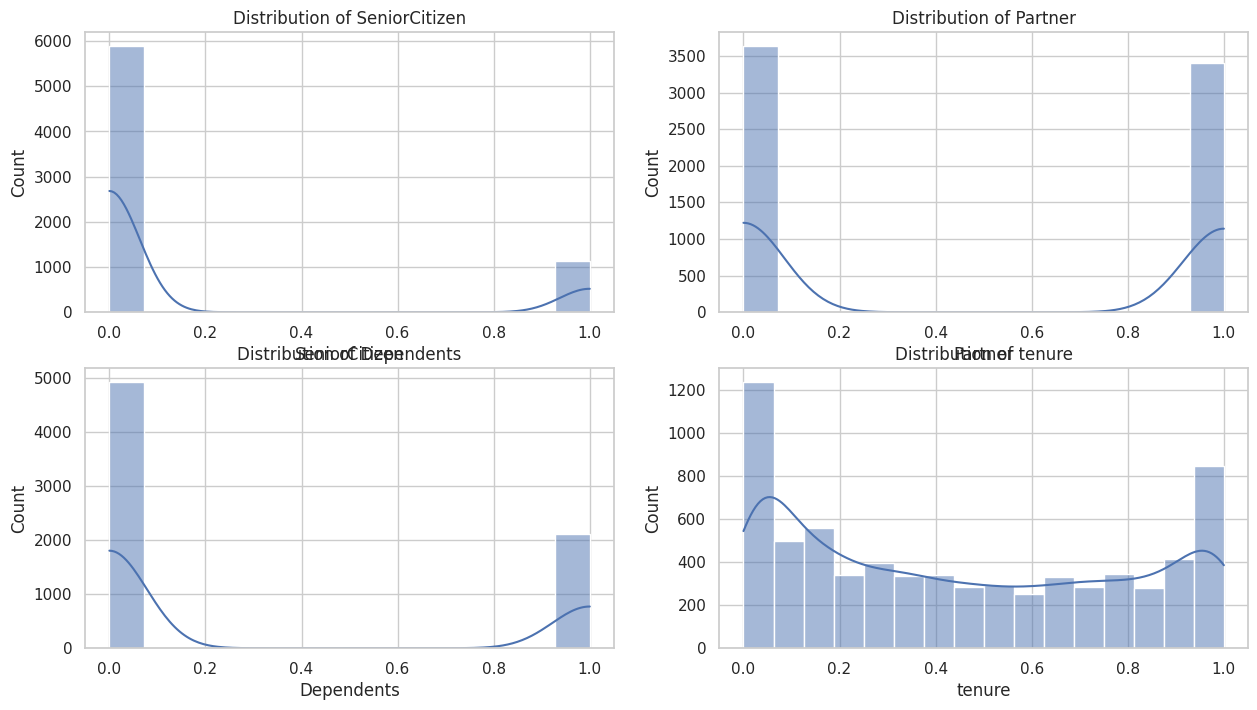

In [22]:

# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

# Handle missing values in the "TotalCharges" column
df["TotalCharges"] = df["TotalCharges"].apply(pd.to_numeric, errors="coerce")
df["TotalCharges"].fillna(df["TotalCharges"].mean(), inplace=True)

# Data summary
summary = df.describe()
print("Data Summary:")
print(summary)

# Visualize the distribution of numerical features
numerical_features = df.select_dtypes(include=[np.number])
sns.set(style="whitegrid")
plt.figure(figsize=(15, 8))
for i, column in enumerate(numerical_features.columns, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data=numerical_features, x=column, kde=True)
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()



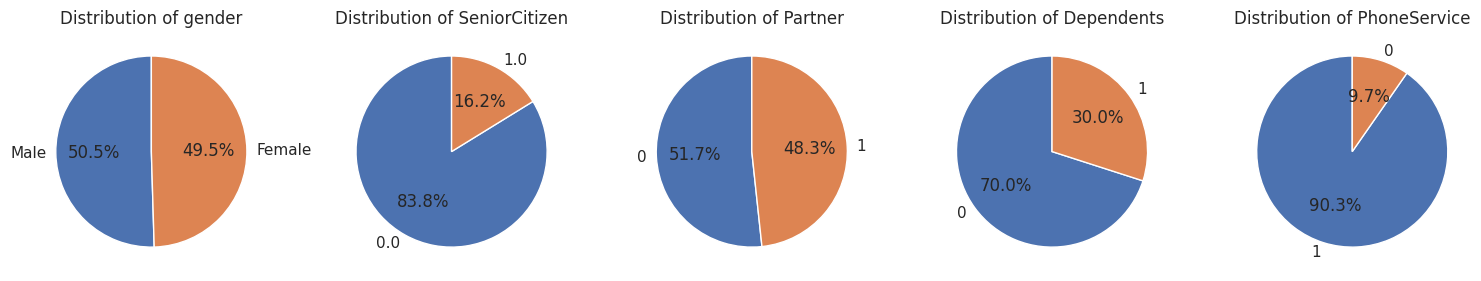

In [23]:

# Define a list of categorical variables you want to create pie charts for
categorical_variables = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService']

# Set up subplots for pie charts
num_plots = len(categorical_variables)
fig, axes = plt.subplots(1, num_plots, figsize=(15, 3))

# Create pie charts for each categorical variable
for i, variable in enumerate(categorical_variables):
    ax = axes[i]
    counts = df[variable].value_counts()
    labels = counts.index
    sizes = counts.values
    ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
    ax.set_title(f'Distribution of {variable}')
    
plt.tight_layout()
plt.show()


Pie charts showing the distribution of each selected categorical variable.

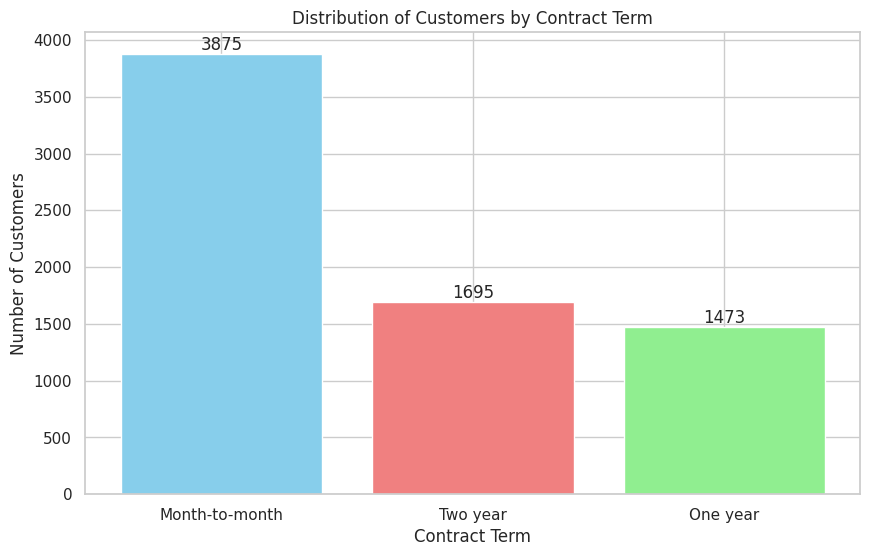

In [24]:

# Count the number of customers for each contract term
contract_counts = df['Contract'].value_counts()

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(contract_counts.index, contract_counts.values, color=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('Distribution of Customers by Contract Term')
plt.xlabel('Contract Term')
plt.ylabel('Number of Customers')

# Display the counts above the bars
for i, count in enumerate(contract_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=12)

plt.show()


Bar chart showing the distribution of customers based on different contract terms, which can help to visualize how many customers are on month-to-month contracts, one-year contracts, and two-year contracts.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


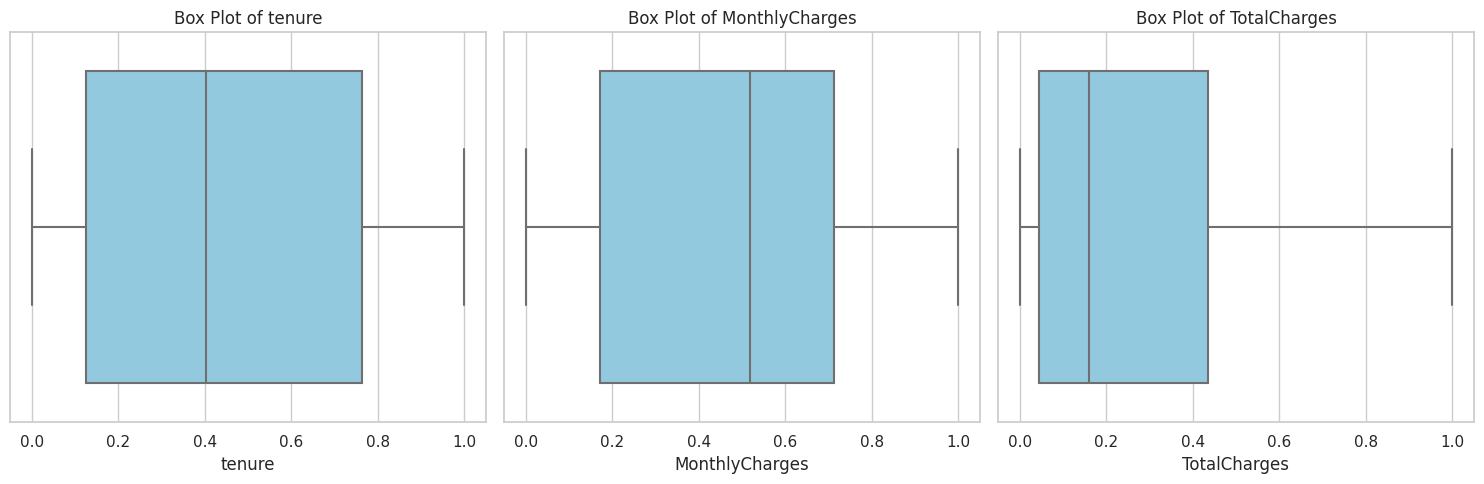

In [25]:

# Define a list of numerical variables you want to create box plots for
numerical_variables = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Set up subplots for box plots
num_plots = len(numerical_variables)
fig, axes = plt.subplots(1, num_plots, figsize=(15, 5))

# Create box plots for each numerical variable
for i, variable in enumerate(numerical_variables):
    ax = axes[i]
    sns.boxplot(data=df, x=variable, ax=ax, orient='v', color='skyblue')
    ax.set_title(f'Box Plot of {variable}')
    
plt.tight_layout()
plt.show()


Box plots showing the distribution of each selected numerical variable in the dataset. Box plots provide information about the median, quartiles, and potential outliers for each variable. 

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


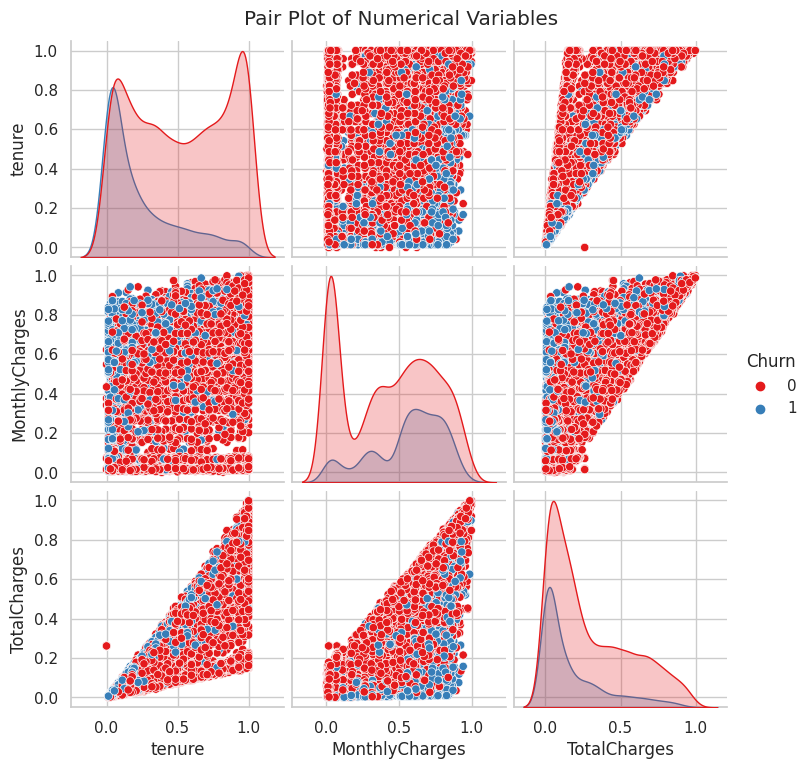

In [26]:

# Define a list of numerical variables you want to include in the pair plot
numerical_variables = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Create a pair plot for the selected numerical variables
sns.pairplot(df, vars=numerical_variables, diag_kind='kde', hue='Churn', palette='Set1')
plt.suptitle('Pair Plot of Numerical Variables', y=1.02)
plt.show()


Pair plot with scatter plots for the selected numerical variables, including kernel density estimates on the diagonal. The pair plot allows us to explore relationships between these variables and understand how they may be related to customer churn.

**BUILDING THE MODEL**

Random Forests and Logistic Regression

In [31]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0.0,1,0,0.013889,0,No phone service,DSL,0.0,1.0,0.0,0.0,0.0,0.0,Month-to-month,1,Electronic check,0.115423,0.001275,0
1,Male,0.0,0,0,0.472222,1,No,DSL,1.0,0.0,1.0,0.0,0.0,0.0,One year,0,Mailed check,0.385075,0.215867,0
2,Male,0.0,0,0,0.027778,1,No,DSL,1.0,1.0,0.0,0.0,0.0,0.0,Month-to-month,1,Mailed check,0.354229,0.010310,1
3,Male,0.0,0,0,0.625000,0,No phone service,DSL,1.0,0.0,1.0,1.0,0.0,0.0,One year,0,Bank transfer (automatic),0.239303,0.210241,0
4,Female,0.0,0,0,0.027778,1,No,Fiber optic,0.0,0.0,0.0,0.0,0.0,0.0,Month-to-month,1,Electronic check,0.521891,0.015330,1


In [32]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder

# Load your preprocessed dataset
data = df

# Split the dataset into features (X) and the target variable (y)
X = data.drop('Churn', axis=1)
y = data['Churn']

# One-hot encode categorical columns
categorical_columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
X_encoded = pd.get_dummies(X, columns=categorical_columns)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Model 1: Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

# Model 2: Logistic Regression
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)

# Evaluate the models
print("Random Forest Model Results:")
print("Accuracy:", accuracy_score(y_test, rf_predictions))
print("Classification Report:")
print(classification_report(y_test, rf_predictions))
print("Confusion Matrix:")
print(confusion_matrix(y_test, rf_predictions))

print("\nLogistic Regression Model Results:")
print("Accuracy:", accuracy_score(y_test, lr_predictions))
print("Classification Report:")
print(classification_report(y_test, lr_predictions))
print("Confusion Matrix:")
print(confusion_matrix(y_test, lr_predictions))


Random Forest Model Results:
Accuracy: 0.7970191625266146
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.66      0.48      0.55       373

    accuracy                           0.80      1409
   macro avg       0.75      0.69      0.71      1409
weighted avg       0.78      0.80      0.79      1409

Confusion Matrix:
[[945  91]
 [195 178]]

Logistic Regression Model Results:
Accuracy: 0.8204400283889283
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.69      0.59      0.64       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.81      0.82      0.82      1409

Confusion Matrix:
[[935 101]
 [152 221]]
